In [66]:
import numpy as np 
import pandas as pd 
import os
import torch
import random
import seaborn as sns
import math
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

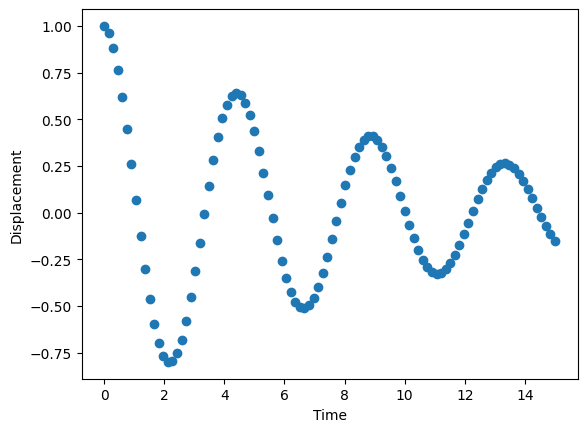

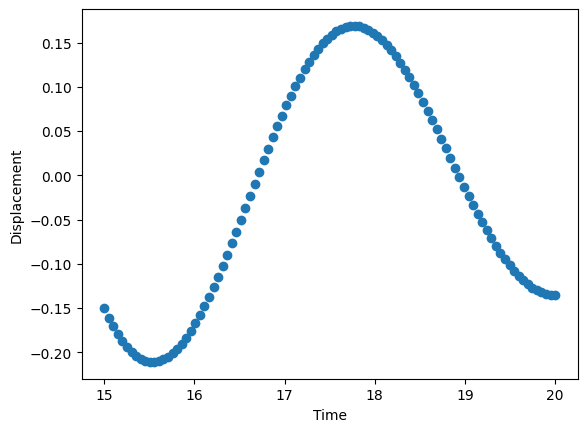

In [143]:
# Generation of Data
'''We will be taking a diffrential equation of Damping osciallation'''
A = 1.0       # Amplitude
b = 0.2       # Damping constant
m = 1.0       # Mass
k = 2.0       # Spring constant
phi_0 = 0.0   # Phase shift

# Calculate omega
omega_0 = np.sqrt(k / m)
omega = np.sqrt(omega_0**2 - (b**2) / (4 * m**2))

# Time points
t = np.linspace(0, 15, 100)  # Time array from 0 to 10 seconds, 100 points
t_test = np.linspace(15, 20, 100)

# Calculate x(t)
x = A * np.exp(-b * t / (2 * m)) * np.cos(omega * t + phi_0)
x_test = A * np.exp(-b * t_test / (2 * m)) * np.cos(omega * t_test + phi_0)
    
# Plotting the Training Data
plt.scatter(t, x)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show()

#Plotting the Testing Data
plt.scatter(t_test,x_test)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show()

In [158]:
# Coding the neural Network
class DiffrentialSolver(nn.Module):
    def __init__(self):
        super(DiffrentialSolver, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 1)
        )
    
    def forward(self, x):
        x = x.view(-1,1)
        return self.network(x)
    
# Setting up the DataSet
t_train = torch.tensor(t, dtype=torch.float32).unsqueeze(1)  # Add dimension for input size
x_train = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
t_test = torch.tensor(t_test, dtype=torch.float32).unsqueeze(1)  # Add dimension for input size
x_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)

# Setting 
model = DiffrentialSolver()
optimizer = optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.MSELoss()

if __name__ == '__main__':
    model_test = DiffrentialSolver()
    data = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
    print(model_test(data))

tensor([[0.0516],
        [0.2544],
        [0.4615],
        [0.6623]], grad_fn=<AddmmBackward0>)


/tmp/ipykernel_30/2078367113.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_test = torch.tensor(t_test, dtype=torch.float32).unsqueeze(1)  # Add dimension for input size
/tmp/ipykernel_30/2078367113.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(1)


In [163]:
def train(model,optimizer,criterion,x_train,t_train,epochs=1000):
    device = torch.device("cuda")
    model.to(device)
    for epoch in range(epochs):
        model.train()
        t_train, x_train = t_train.to(device), x_train.to(device)
        output = model(t_train)
        loss = criterion(output, x_train)
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
        if (epoch+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [165]:
train(model, optimizer, criterion, x_train, t_train, 10000)

Epoch [2000/10000], Loss: 0.0004
Epoch [4000/10000], Loss: 0.0004
Epoch [6000/10000], Loss: 0.0004
Epoch [8000/10000], Loss: 0.0004
Epoch [10000/10000], Loss: 0.0004


In [166]:
def plot(model, t_test, x_test, t_train, x_train):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Check for GPU availability
    model.to(device) 
    x_test_predicted = []
    x_train_predicted = []
    model.eval() 
    for data in t_test:
        data = torch.tensor(data, dtype=torch.float32).view(-1, 1).to(device)  
        with torch.no_grad():
            x_test_predicted.append(model(data).cpu().item())

    for data in t_train:
        data = torch.tensor(data, dtype=torch.float32).view(-1, 1).to(device)  
        with torch.no_grad():
            x_train_predicted.append(model(data).cpu().item())  
    
    x_test_predicted = np.array(x_test_predicted)
    x_train_predicted = np.array(x_train_predicted)

    # Train plot
    plt.scatter(t_train, x_train, color='red', label='Actual')
    plt.scatter(t_train, x_train_predicted, color='blue', label='Predictions')
    plt.title('Train Data Predictions')
    plt.xlabel('Time')
    plt.ylabel('Displacement')
    plt.legend()
    plt.show()

    # Test plot
    plt.scatter(t_test, x_test, color='red', label='Actual')
    plt.scatter(t_test, x_test_predicted, color='blue', label='Predictions')
    plt.title('Test Data Predictions')
    plt.xlabel('Time')
    plt.ylabel('Displacement')
    plt.legend()
    plt.show()


/tmp/ipykernel_30/525325574.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.float32).view(-1, 1).to(device)


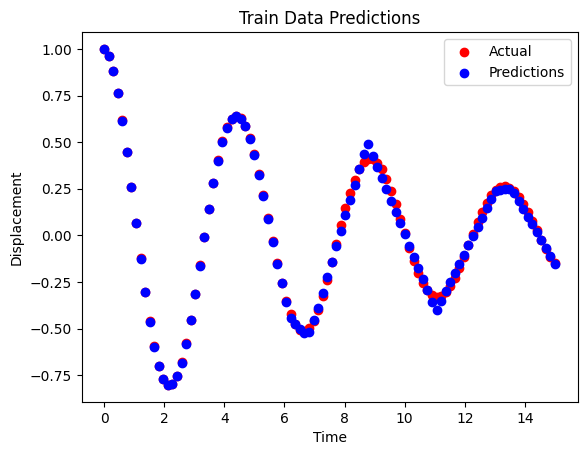

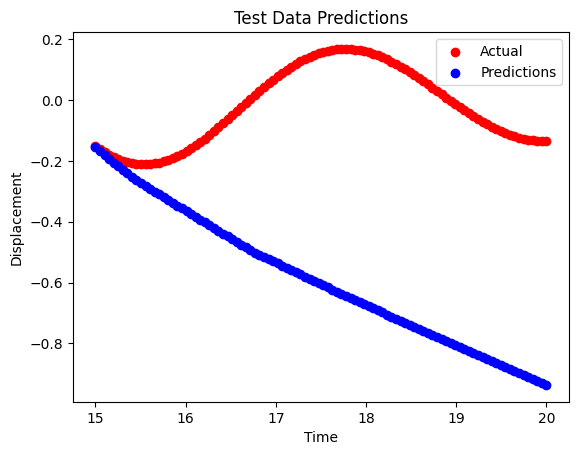

In [167]:
plot(model,t_test,x_test,t,x)